**Homework 5**

(1) In this part, we will predict the number of applications received
using the other variables in the $\it{College}$ data set.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing

Load the 'College.csv' data set

In [5]:
df = pd.read_csv('College.csv')
#load the 'College.csv' file here

In [6]:
df.head(1000)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


(a) Split the data set into a training set and a test set.

In [7]:
df.drop(df.columns[0], axis=1, inplace=True)
df = pd.get_dummies(df)
df.head(1000)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False,True
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False,True
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False,True
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,False,True
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,True,False
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,False,True
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,False,True
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,False,True


In [11]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Apps', axis=1)
y_train = train['Apps']

x_test = test.drop('Apps', axis = 1)
y_test = test['Apps']

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [12]:
#scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#import
from sklearn.metrics import mean_squared_error 
from math import sqrt

#OSI
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
RMSE = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE(OSI) = " + str(RMSE))

RMSE(OSI) = 3270.655267742185


(c) Fit a ridge regression model on the training set. Report the test error obtained.

In [13]:
#ridge regression
model = RidgeCV()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
RMSE = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE(Ridge) = " + str(RMSE))

RMSE(Ridge) = 2878.547499323906


(d) Fit a lasso model on the training set. Report the test error obtained, along with the number
of non-zero coefficient estimates.

In [14]:
#lasso
model = LassoCV()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)
RMSE = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE(Lasso) = " + str(RMSE))
print((model.coef_ != 0).sum())

RMSE(Lasso) = 3182.624344573394
17


(e) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there a significant differnce among the test errors resulting from these three approaches?

These 3 models can all give predictions of the application numbers.

- We use RMSE to show the accurancy of prediction.
- According to the performance, *Ridge Regression* has the least RMSE in this case. 
- *OSI* and *Lasso regression* have similar performance. What's more, Lasso Regression pick 15 coefficients out of 17.

(2) In this part, we will use logistic regression and KNN classifier on the *Weekly* dataset. 

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization https://seaborn.pydata.org/index.html
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from patsy import dmatrices

%matplotlib inline

Load the 'Weekly.csv' data set.

In [49]:
#df = pd.read_csv('..')
#load the 'Weekly.csv' file here
datafile = pd.read_csv('Weekly.csv')

(a) Produce some numerical and graphical summaries of the *Weekly*
data. Do there appear to be any patterns?

In [52]:
datafile['Direction'] = datafile['Direction'].map({'Down':0, 'Up':1})

# Numerical Weekly summary
# descriptive statistics
statistics = datafile.describe()
print(statistics)

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today    Direction  
count  1089.000000  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899     0.555556  
std       2.361285     1.686636     2.356927     0.497132  
min     -18.195000     0.087465   -18.195000     0.000000  
25%      -1.166000     0.332022  

In [54]:
# correlation matrix
correlation_matrix = datafile.corr()
print(correlation_matrix)

               Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519   
Lag1      -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183   
Lag2      -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499   
Lag3      -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657   
Lag4      -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675   
Lag5      -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000   
Volume     0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517   
Today     -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013   
Direction -0.022200 -0.050004  0.072696 -0.022913 -0.020549 -0.018168   

             Volume     Today  Direction  
Year       0.841942 -0.032460  -0.022200  
Lag1      -0.064951 -0.075032  -0.050004  
Lag2      -0.085513  0.059167   0.072696  
Lag3      -0.069288 -0.071244  -0.022913  
Lag4      -0.061075 -0.007826  -0.020549  
Lag5      -

Text(0.5, 0, 'Return')

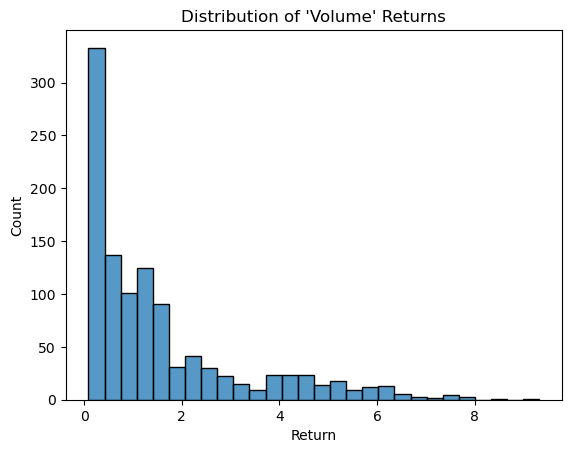

In [76]:
# Histogram of Volume
sns.histplot(datafile['Volume'])
plt.title("Distribution of 'Volume' Returns")
plt.xlabel("Return")

Text(0.5, 0, 'Return')

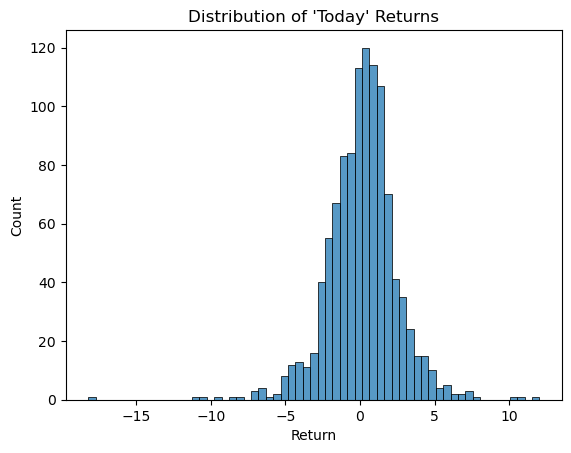

In [78]:
# Histogram of Today
sns.histplot(datafile['Today'])
plt.title("Distribution of 'Today' Returns")
plt.xlabel("Return")

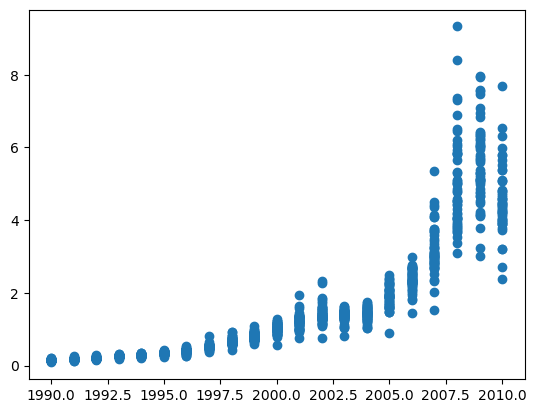

In [88]:
plt.scatter(datafile['Year'],datafile['Volume']);

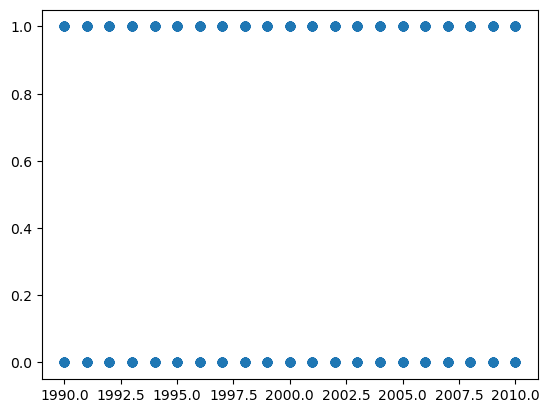

In [90]:
plt.scatter(datafile['Year'],datafile['Direction']);

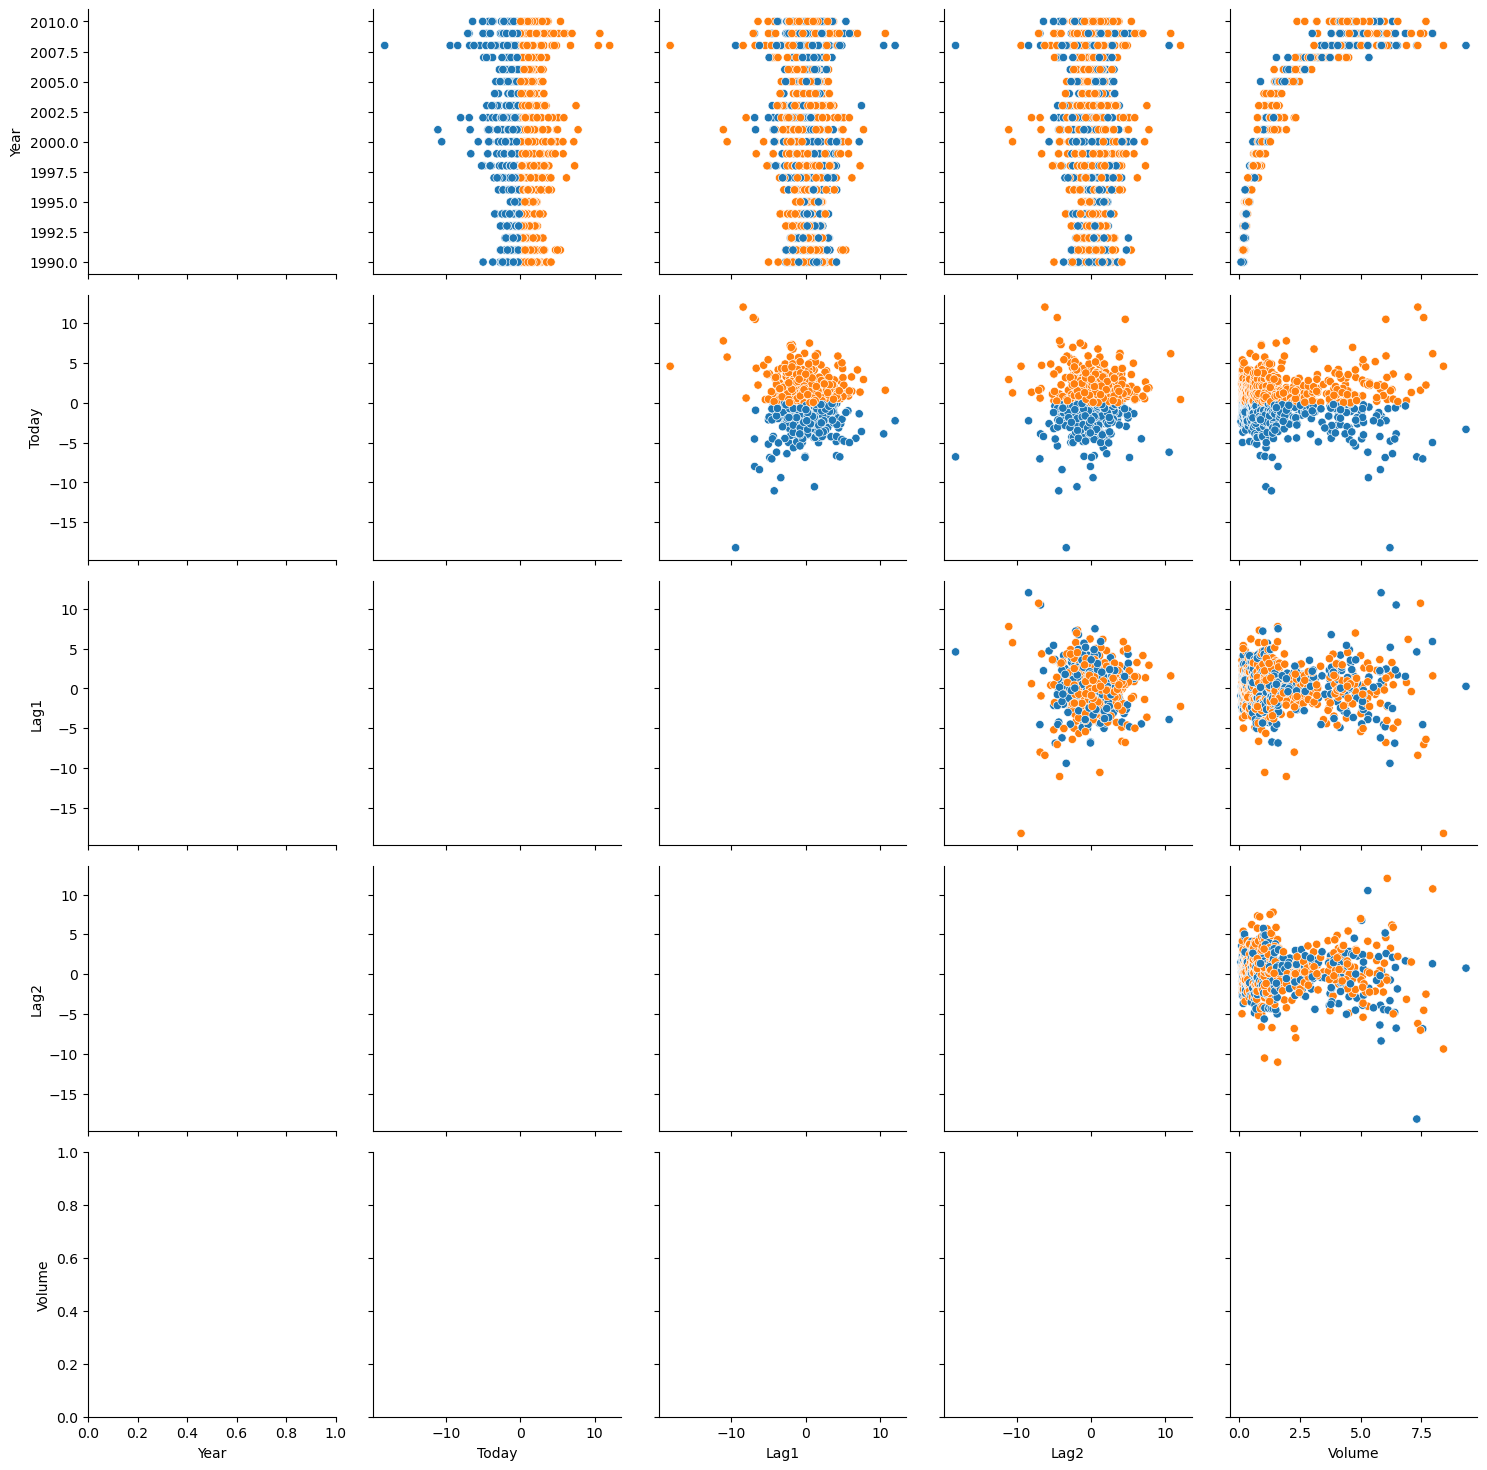

In [106]:
g = sns.PairGrid(datafile, vars=['Year', 'Today', 'Lag1', 'Lag2', 'Volume'], hue='Direction', height=3)
g.map_upper(sns.scatterplot)


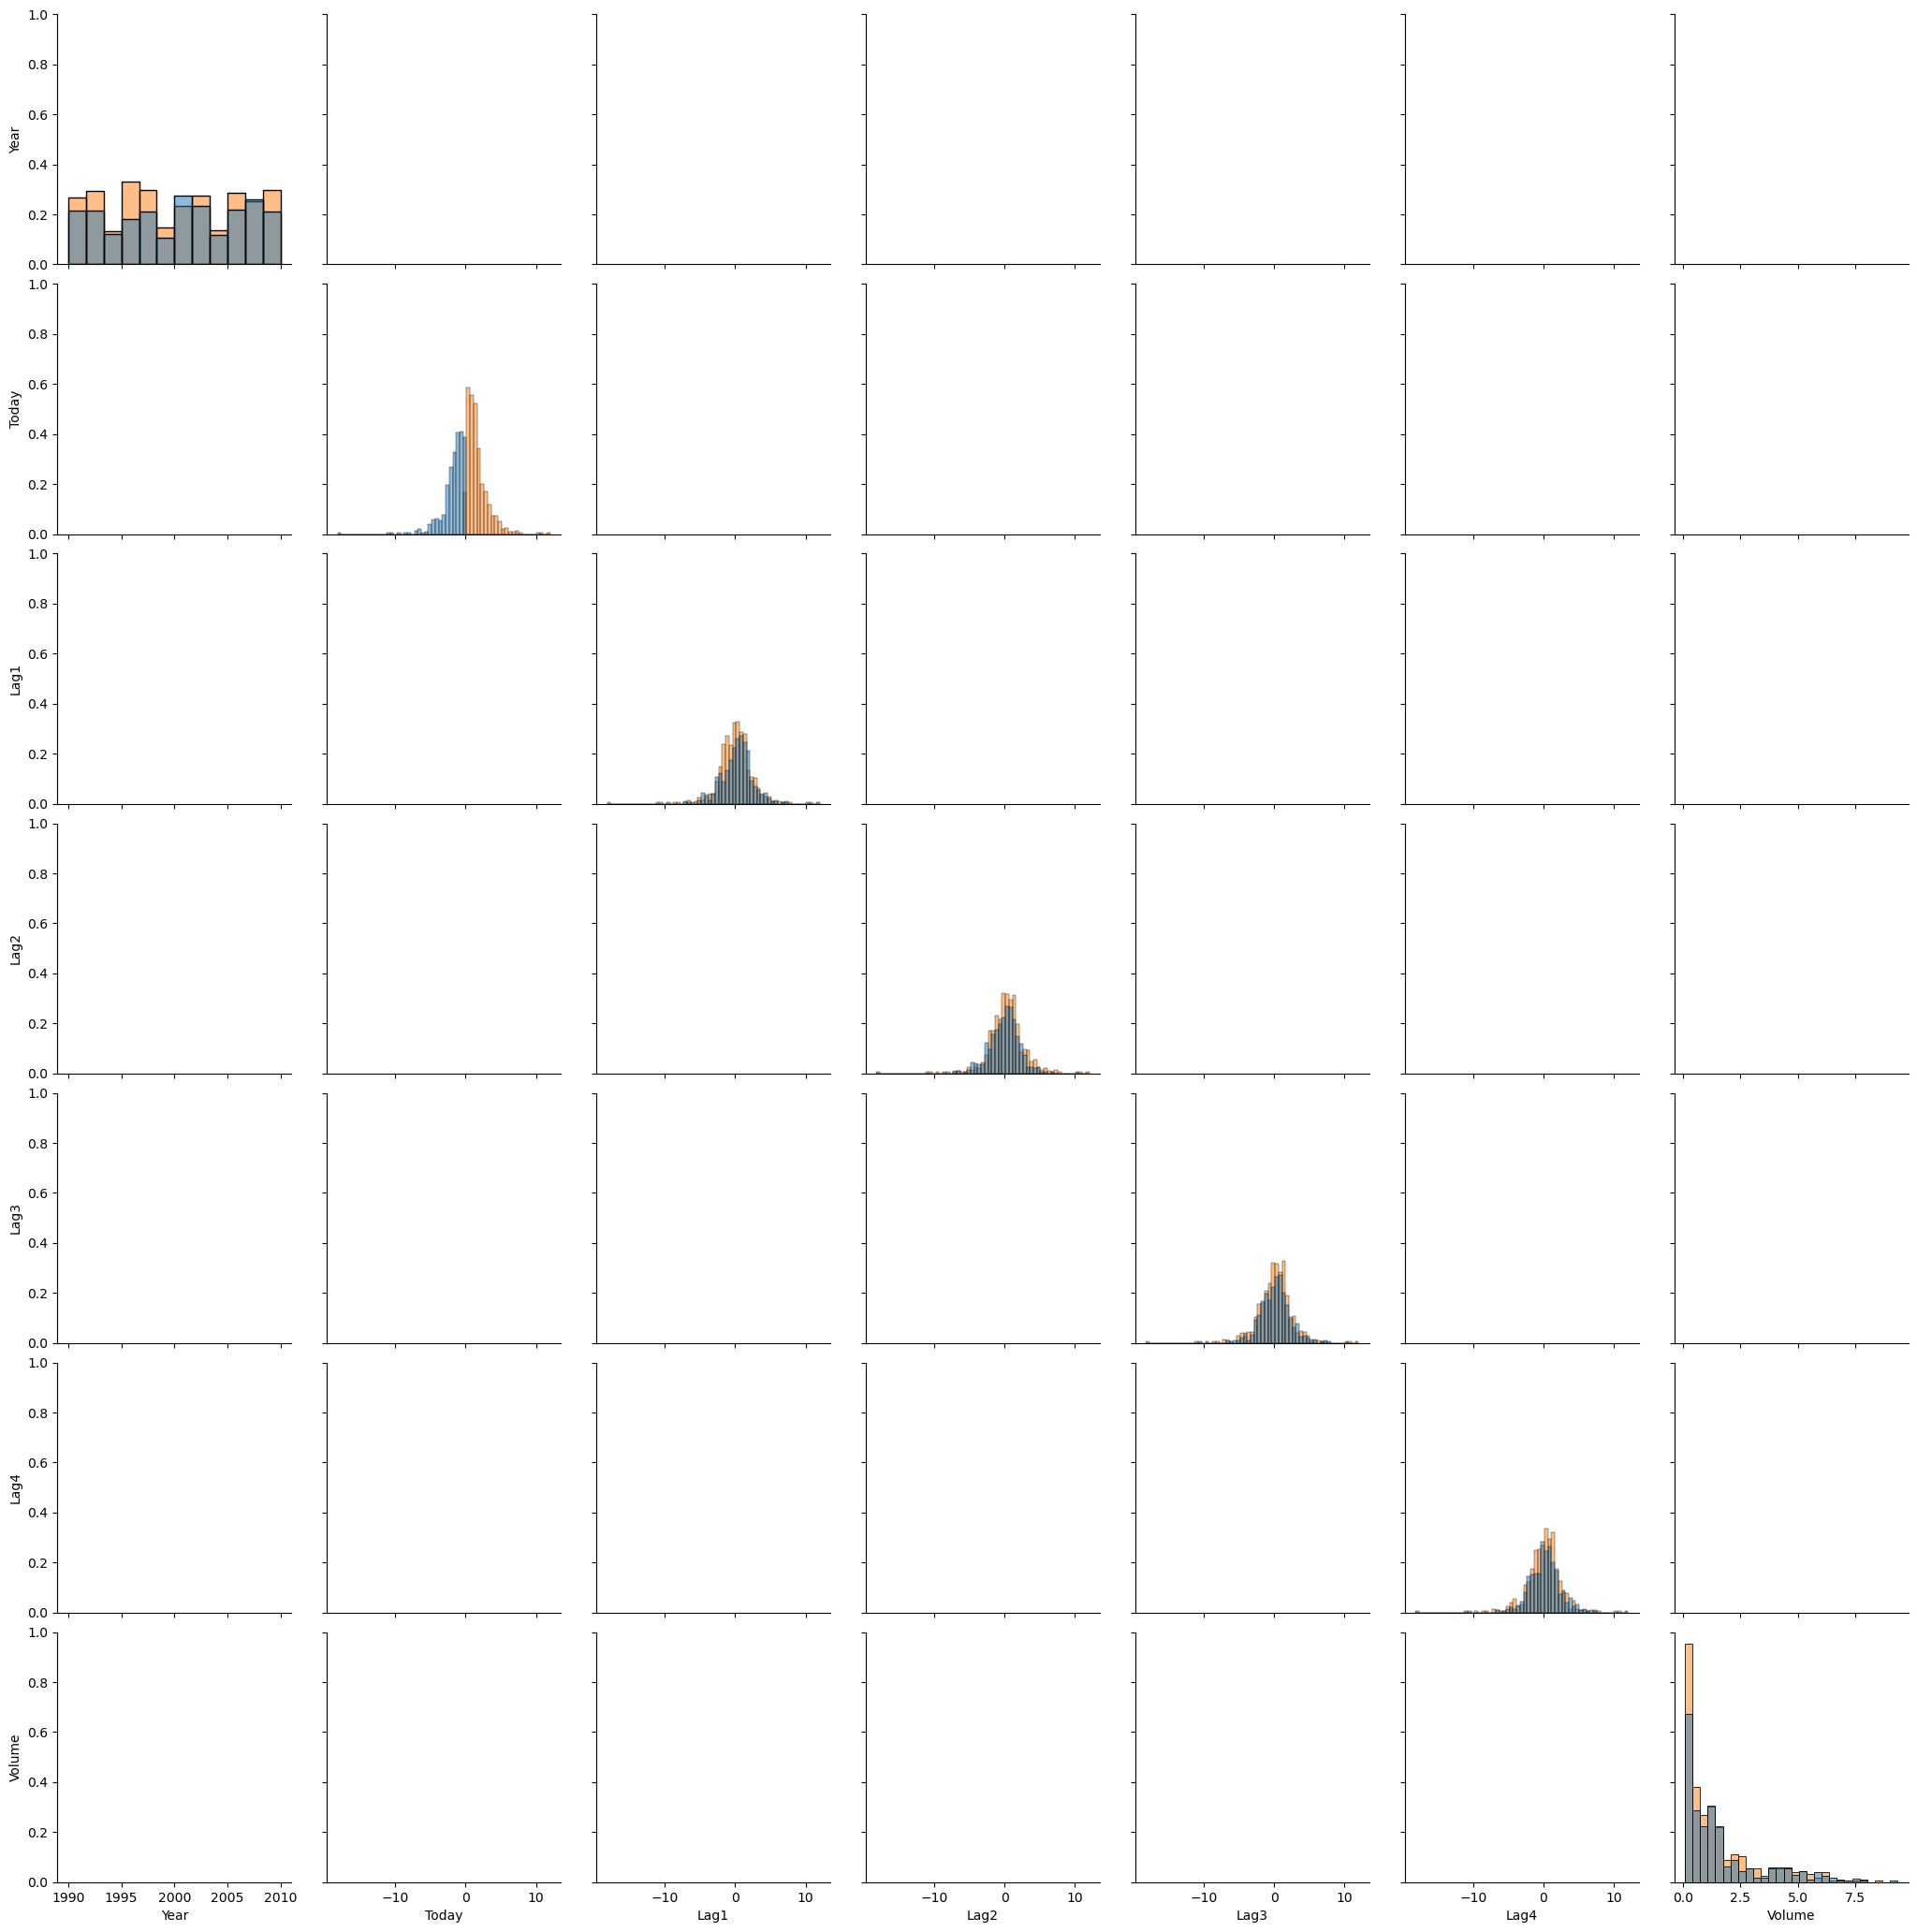

In [114]:
h = sns.PairGrid(datafile, vars=['Year', 'Today', 'Lag1', 'Lag2', 'Lag3', 'Lag4','Volume'], hue='Direction', height=3)
h.map_diag(sns.histplot)

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [260]:
predictors = datafile[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
#response = (datafile['Direction'] == 'Up').astype(int)
response = datafile['Direction']

In [264]:
# Add a constant term to the predictors
X = sm.add_constant(predictors)
y = response
# Fit the logistic regression model
# using statsmodels.api to print summary of statistics
model = sm.Logit(y, X)
results = model.fit()

# Print the summary of the results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        10:53:06   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Lag2 seems to be a predictor with statistical significance as Lag2 has a small P|z| which meaning that there's a small probability that Lag2 coefficient is equal to zero.

In [267]:
# First we will need to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.33, random_state=42)
lr = LogisticRegression(random_state=42)
lr_model = lr.fit(X_train, y_train)
response_pred = lr_model.predict(X_test)

In [269]:
lr_model.intercept_ #interception

array([0.24929242])

In [271]:
lr_model.coef_ #independent var. coefs

array([[-0.04658596,  0.06732614, -0.04436294, -0.05207724,  0.00133604,
        -0.03788857]])

(c) Fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [317]:
df_1990_2008 = datafile[(datafile['Year'] >=1990) & (datafile['Year'] <=2008)]
X_train = df_1990_2008['Lag2']
X_train = X_train.values.reshape(np.shape(X_train)[0],1) # to solve a value error. 
y_train = df_1990_2008['Direction']
lr_model = lr.fit(X_train, y_train)

In [319]:
lr_model.coef_

array([[0.0580307]])

In [321]:
lr_model.intercept_

array([0.20323048])

In [323]:
# Make predictions on the test set
df_2009_2010 = datafile[(datafile['Year'] >=2009) & (datafile['Year'] <=2010)]
X_test = df_2009_2010['Lag2']
X_test = X_test.values.reshape(np.shape(X_test)[0],1)
y_test = df_2009_2010['Direction']
y_pred = lr_model.predict(X_test)

In [325]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 9 34]
 [ 5 56]]


In [327]:
#Print fraction of correct predictions
lr_model.score(X_test, df_2009_2010['Direction'])

0.625

(d) Repeat (c) using KNN classifier with *K*=1 and *K*=10.

In [330]:
# With K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(X_train,y_train)

In [332]:
y_pred = knn.predict(X_test)

In [334]:
print(confusion_matrix(y_test, y_pred))

[[22 21]
 [32 29]]


In [336]:
knn_model.score(X_test, df_2009_2010['Direction'])

0.49038461538461536

In [338]:
# With K = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(X_train,y_train)

In [340]:
y_pred = knn.predict(X_test)

In [342]:
print(confusion_matrix(y_test, y_pred))

[[22 21]
 [24 37]]


In [344]:
knn_model.score(X_test, df_2009_2010['Direction'])

0.5673076923076923

From confusion matrix which is representing:
[[True Positives, False Positives]
 [False Negatives, True Negatives] ]

- (10-NN Classifier) has fewer false negatives compared to (1-NN Classifier)
- (10-NN Classifier) has more true negatives compared to (1-NN Classifier), which indicating that (10-NN Classifier) is better at avoiding false positives. 

So we can conclude that: 
(10-NN Classifier)performs better in terms of overall accuracy showing fewer errors in both false positives and false negatives compare to (1-NN Classifier) which has results in more false negatives and fewer true negatives reflecting overfitting issue.